<a href="https://colab.research.google.com/github/RasPi101/RaspberryShake-code/blob/main/DataDownload-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Colab Notebook 

This Notebook will be used for downloading data from Raspberry Shake.

To get started, we shall go through some simple exercises to understand what coding is all about. 

The code below shows a simple way of plotting the equation for a straight line -> y = mx + c. The green text next to each code will explain what the specific line is doing.

Once you have changed the 'x' values to a range of numbers you want, click on 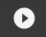 to run the code. You will then see the plot.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt # Both lines import the numpy and matplotlib coding package

# Here, the variables are being defined:
m = 2 # The gradient of the equation is a constant value at 2.
x = np.arange(-10,11,1) # Using numpy, a list of numbers ranging from -10 to 10 is created.
c = 2 # The y-intercept is defined.
y = m*x+c # The equation of a stright line is defined.

print('The x values are', x) # These values of x are printed above the graph.
plt.plot(x,y) # Using matplotlib, the code tells your computer to plot x VS y.
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0") # These 2 lines are plotting the x and y axis centred at the point (0,0)
plt.grid()

# Onto Real Data

Run the code line below to import and install the required package for this activity - Obspy

Remember, to run the code, click on the 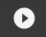 icon. Note that the download may take a moment.

In [1]:
try:
  import obspy
except:
  !pip install obspy

## Restart Runtime

After installing obspy, you need to restart the runtime. Select the "Runtime" menu, and select "Restart runtime" then re-run the code.

(This is due to a subtlety of how Google Colab works)

# Downloading Data!

Note that each section of code is called a cell. So, in the first cell is a code used to create a file with different sets of data taken from a Raspberry Shake.

For example, the first file is named 'Cardiff', as it is data from a Raspberry Shake in Cardiff. This line of code is given a URL (i.e 'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-1') which contains the data. It then extracts this data and converts the file into a "cardiff.mseed" file. The file is then stored in the local repository image.png.


In [2]:
files={
    'Sydney':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-2','filename':'Sydney.mseed'},
    'California':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-3','filename':'California.mseed'},
    'Greenland':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-5','filename':'Greenland.mseed'},
    'China':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-7','filename':'China.mseed'},
    'Philipines':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-8','filename':'Philipines.mseed'},
    'Japan':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-9','filename':'Japan.mseed'},
    'Mexico_South_Border':{'url':'https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-10','filename':'Mexico.mseed'},
}

In [10]:
name ='Japan' # To correctly plot the data, type the place that the data comes from.
import os
if not os.path.isfile(files[name]['filename']):
  command='wget {} -O {}'.format(files[name]['url'],files[name]['filename'])
  print('running command:',command)
  res=os.system(command)
  if res==0:
    print('file successfully dowloaded to {}'.format(files[name]['filename']))
  else:
    print('problem downloading from {}: {}'.format(files[name]['url'],res))
else:
  print('File already downloaded to {}'.format(files[name]['filename']))

running command: wget https://github.com/Mattbrake951/Rspberry-Shake-data/raw/main/query-9 -O Japan.mseed
file successfully dowloaded to Japan.mseed


At this point, we have imported the data from the Raspberry Shakes around the world, the packages needed to plot the data and we have also created the code necessary to plot.

now we simply need to tell your computer to plot this data:

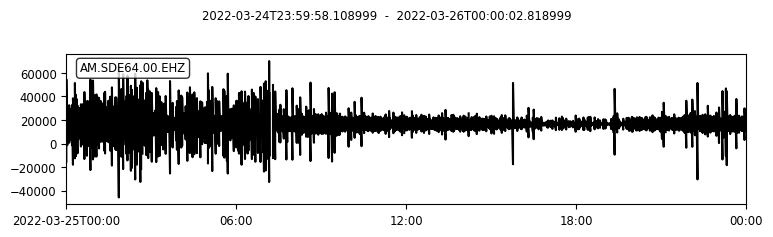

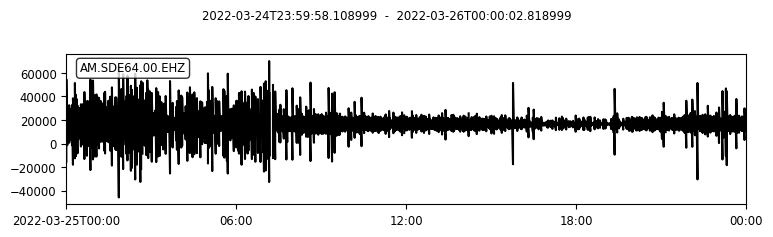

In [11]:
stream = obspy.read(files[name]['filename']) 
stream.plot() # The 'Stream' then puts the data into a plot 

# What is This Plot Showing?
As said prevously, the Raspberry Shake measures motion in a certain direction over an amount of time. It is then plotted as shown above. 

Therefore, the plot must be showing the speed at which the Raspberry Shake is vibrating on the y-axis (vertical axis) and how this speed changes with time is plotted on the x-axis (horizontal axis).
## Plotting a More Specific Time Range of Data

The previous plot shows the speed of vibration of the Raspberry Shake over a 24 hours period. This long period makes it hard to analyise as the time is squeezed into a small plot.

The code below is provided to re-create the plot of data but over a specific period of time within the 24 hour plot.

Note that in the UTCDateTime() code, the variables represent the year, month, Day of the month and hour of the day which the data was collected. These pieces of informtaion are seen at the top of each plot - the time can be chosen based on the time range on the x-axis. For example, the plot below

 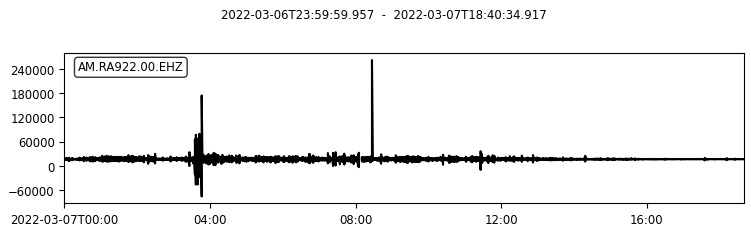 

shows the data collected between 00:00 (24hr clock) and 18:40 on the 7th of March 2022. Therefore, you can choose any hour within this time.

In [ ]:
from datetime import datetime # Importing the required package to re-create the plot
starttime=obspy.UTCDateTime(year=2022,month=3,day=7,hour=8) # This line defines the time which you want to start the plot from
endtime=obspy.UTCDateTime(year=2022,month=3,day=7,hour=9) # This line defines the time which you want to end the plot
print('plotting from {} to {}'.format(starttime,endtime)) # This prints a sentence, above the plot, explaining what hour interval you have chosen to look at.
stream.plot(starttime=starttime,endtime=endtime) # This creates the new plot.